<a href="https://colab.research.google.com/github/multimediary/python-Dicoding/blob/master/prediksi-gambar-rockscissorspaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [248]:
# Kriteria : Program dikerjakan pada Google Colaboratory
import tensorflow as tf
import zipfile,os
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [249]:
# Cek folder existing jika ada maka hapus
dir_path = '/tmp'
if os.path.exists(dir_path):
  shutil.rmtree(dir_path)
# Lalu buat ulang, hal ini agar jika Runtime All tidak ada kesalahan
os.mkdir(dir_path)
# Ambil dataset dari repository dan simpan di directory /tmp, Resources dari Dicoding saya download dan saya upload ke dalam Github Repo pribadi saya
!wget --no-check-certificate \
  https://github.com/multimediary/dataset/blob/master/rockpaperscissors.zip?raw=true -O /tmp/rockpaperscissors.zip

--2020-07-21 10:49:39--  https://github.com/multimediary/dataset/blob/master/rockpaperscissors.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/multimediary/dataset/raw/master/rockpaperscissors.zip [following]
--2020-07-21 10:49:39--  https://github.com/multimediary/dataset/raw/master/rockpaperscissors.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/multimediary/dataset/master/rockpaperscissors.zip [following]
--2020-07-21 10:49:39--  https://raw.githubusercontent.com/multimediary/dataset/master/rockpaperscissors.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connecte

In [250]:
# Ekstraksi Dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Cek isi directory tmp
os.listdir('/tmp')

['scissors', 'paper', 'rock', 'rockpaperscissors.zip']

In [251]:
# Kriteria : Dataset harus dibagi menjadi train set dan validation set. # Sehingga Untuk membagi data menjadi train set dan valiadtion set dapat menggunakan sklearn
from sklearn.model_selection import train_test_split

# define variable lokasi base directory tmp
base_directory = '/tmp'

# define variable lokasi directory rock
rock_directory = os.path.join(base_directory, 'rock')

# define variable lokasi directory scissors
scissors_directory = os.path.join(base_directory, 'scissors')

# define variable lokasi directory paper
paper_directory = os.path.join(base_directory, 'paper')

# Kriteria : Ukuran validation set harus 40% dari total dataset. (data training memiliki 1314 sampel, dan data validation sebanyak 874 sampel). # test_size dibuat 0.4 (40%)

# Memecah data training dan validation rock
train_rock_directory, validation_rock_directory = train_test_split(os.listdir(rock_directory), test_size=0.4, random_state=42, shuffle=False)

# Memecah data training dan validation scissor
train_scissor_directory, validation_scissor_directory = train_test_split(os.listdir(scissors_directory), test_size=0.4, random_state=42, shuffle=False)

# Memecah data training dan validation paper
train_paper_directory, validation_paper_directory = train_test_split(os.listdir(paper_directory), test_size=0.4, random_state=42, shuffle=False)

In [252]:
# define variable lokasi train directory dan validation directory
train_directory = os.path.join(base_directory,'train')
validation_directory = os.path.join(base_directory, 'validation')

# membuat direktori train dan validation
if not os.path.exists(train_directory):
  os.mkdir(train_directory)
if not os.path.exists(validation_directory):
  os.mkdir(validation_directory)

# define variable lokasi directory rock, scissor, paper
train_rock = os.path.join(train_directory, 'rock')
train_scissors = os.path.join(train_directory, 'scissors')
train_paper = os.path.join(train_directory, 'paper')
validation_rock = os.path.join(validation_directory, 'rock')
validation_scissors = os.path.join(validation_directory, 'scissors')
validation_paper = os.path.join(validation_directory, 'paper')

# membuat directory baru di dalam directory train
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)

# membuat directory baru di dalam directory validation
if not os.path.exists(validation_rock):
  os.mkdir(validation_rock)
if not os.path.exists(validation_scissors):
  os.mkdir(validation_scissors)
if not os.path.exists(validation_paper):
  os.mkdir(validation_paper)

In [253]:
# menyalin data train dan data validation ke dalam masing-masing directory baru
for i in train_rock_directory:
  shutil.copy(os.path.join(rock_directory, i), os.path.join(train_rock, i))
for i in train_scissor_directory:
  shutil.copy(os.path.join(scissors_directory,i), os.path.join(train_scissors,i))
for i in train_paper_directory:
  shutil.copy(os.path.join(paper_directory,i), os.path.join(train_paper,i))

for i in validation_rock_directory:
  shutil.copy(os.path.join(rock_directory, i), os.path.join(validation_rock,i))
for i in validation_scissor_directory:
  shutil.copy(os.path.join(scissors_directory,i), os.path.join(validation_scissors,i))
for i in validation_paper_directory:
  shutil.copy(os.path.join(paper_directory,i), os.path.join(validation_paper,i))

In [254]:
# Kriteria :  Harus mengimplementasikan augmentasi gambar # Kriteria :  Menggunakan image data generator # Pada Image Data Generator ditambahkan paramater agumentasinya
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [255]:
train_generator = train_datagen.flow_from_directory(
        train_directory,  # direktori data train
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical') # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'

validation_generator = test_datagen.flow_from_directory(
        validation_directory, # direktori data validation
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        class_mode='categorical') # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [256]:
# Kriteria : Model harus menggunakan model sequential
model_sequential = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax') # Activation menggunakan softmax karena terdapat 3 kelas
])

In [257]:
model_sequential.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [258]:
# Kriteria : Pelatihan model tidak melebihi waktu 30 menit
# Kriteria : Akurasi dari model minimal 85%
model_sequential.fit(
      train_generator,
      steps_per_epoch=25,  # jumlah batch yang dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # jumlah batch yang dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 8s - loss: 1.1769 - accuracy: 0.3500 - val_loss: 1.1183 - val_accuracy: 0.2000
Epoch 2/20
25/25 - 8s - loss: 1.1076 - accuracy: 0.2500 - val_loss: 1.0998 - val_accuracy: 0.3000
Epoch 3/20
25/25 - 7s - loss: 1.0988 - accuracy: 0.3600 - val_loss: 1.0919 - val_accuracy: 0.4500
Epoch 4/20
25/25 - 7s - loss: 1.0986 - accuracy: 0.3600 - val_loss: 1.0786 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 7s - loss: 1.0990 - accuracy: 0.3100 - val_loss: 1.0798 - val_accuracy: 0.4500
Epoch 6/20
25/25 - 7s - loss: 1.0815 - accuracy: 0.4100 - val_loss: 0.9646 - val_accuracy: 0.4000
Epoch 7/20
25/25 - 7s - loss: 1.0325 - accuracy: 0.4600 - val_loss: 1.1321 - val_accuracy: 0.3000
Epoch 8/20
25/25 - 7s - loss: 0.8479 - accuracy: 0.5600 - val_loss: 0.7989 - val_accuracy: 0.8500
Epoch 9/20
25/25 - 7s - loss: 0.7346 - accuracy: 0.6600 - val_loss: 1.1144 - val_accuracy: 0.3500
Epoch 10/20
25/25 - 7s - loss: 0.7104 - accuracy: 0.6800 - val_loss: 0.8513 - val_accuracy: 0.5500
Epoch 11/20
25/25 -

Saving Screenshot_1.jpg to Screenshot_1 (3).jpg
Screenshot_1.jpg
rock


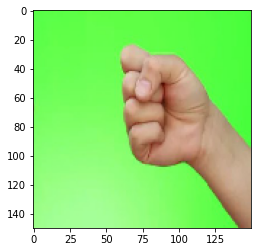

In [262]:
# Kriteria : Dapat memprediksi gambar yang diunggah ke Colab
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  gambar = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(gambar)
  x = image.img_to_array(gambar)
  x = np.expand_dims(x, axis=0)

  gambar_prediksi = np.vstack([x])
  classes = model_sequential.predict(gambar_prediksi, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')